In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
df=pd.read_csv(url)

print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None


In [3]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [4]:
df['age'].fillna(df['age'].median(), inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df.drop(columns=['deck'], inplace=True)
df.dropna(inplace=True)

C:\Users\Sai Kiran Mahalingam\AppData\Local\Temp\ipykernel_2704\991922158.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\Sai Kiran Mahalingam\AppData\Local\Temp\ipykernel_2704\991922158.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [5]:
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


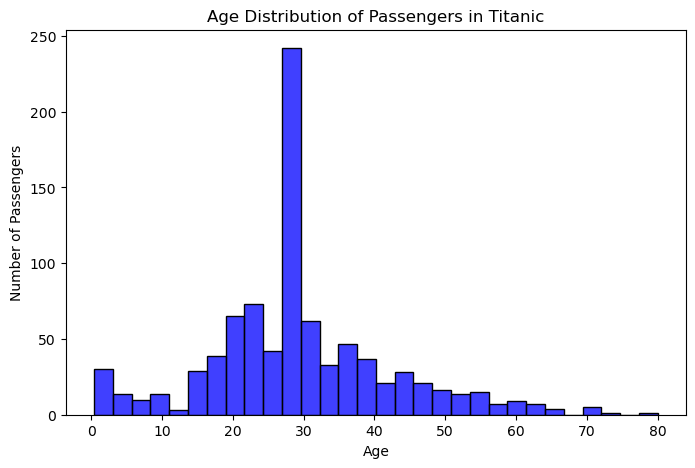

In [7]:
#Age distribution Vizualization

plt.figure(figsize=(8,5))
sns.histplot(df['age'],color='blue')
plt.title("Age Distribution of Passengers in Titanic")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

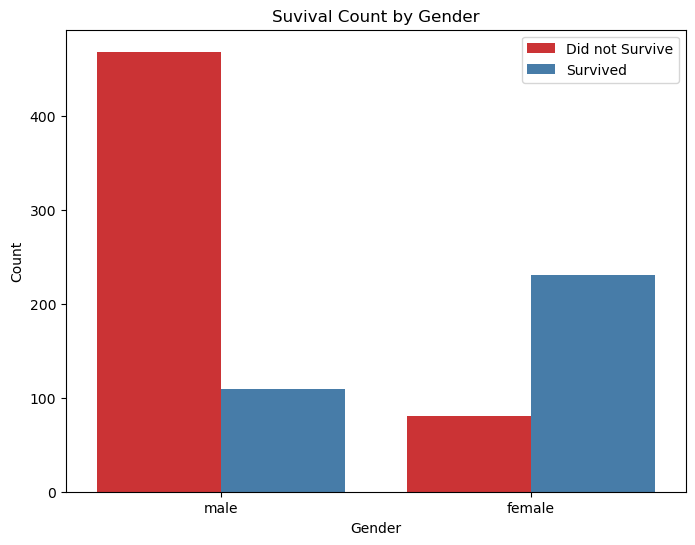

In [8]:
#Survival count by Gender Visualization

plt.figure(figsize=(8,6))
sns.countplot(x='sex',hue='survived',data=df,palette='Set1')
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["Did not Survive","Survived"])
plt.show()

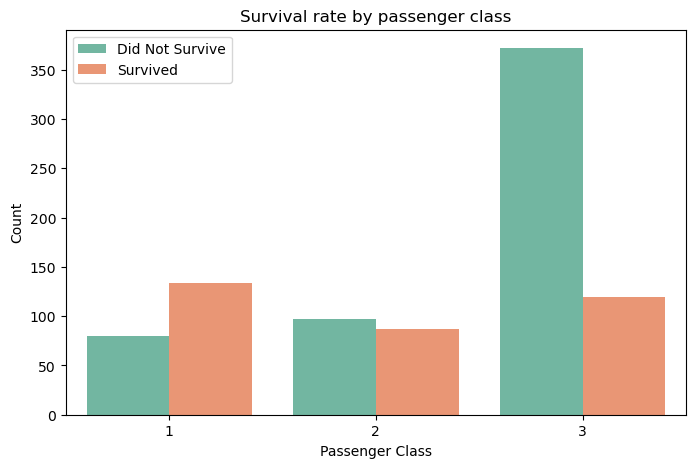

In [12]:
#Survival rate by Passenger class

plt.figure(figsize=(8,5))
sns.countplot(x='pclass',hue='survived',data=df,palette='Set2')
plt.title("Survival rate by passenger class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(["Did Not Survive","Survived"])
plt.show()

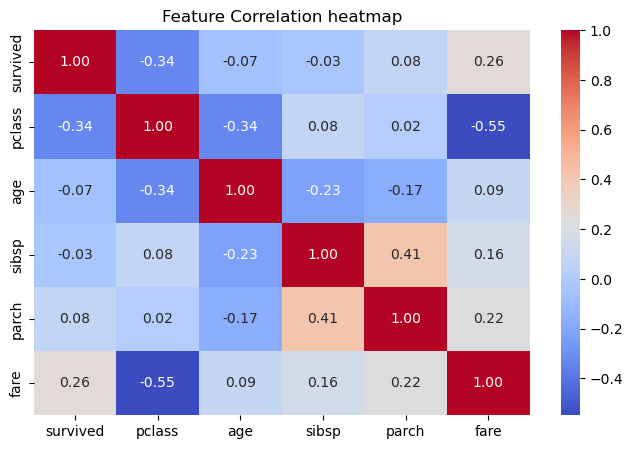

In [19]:
#Correlation 

plt.figure(figsize=(8,5))
n_df=df.select_dtypes(include=['number'])
sns.heatmap(n_df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Feature Correlation heatmap")
plt.show()

In [35]:
#Converting columns into numeric values

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


df['sex']=df['sex'].map({'male':0,'female':1})
df['embark_town']=LabelEncoder().fit_transform(df['embark_town'])

#select relevant features and Target

ft=['pclass','age','sibsp','parch','fare','embark_town']
target=['survived']

x =df[ft]
y =df[target]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (711, 6)
Testing data shape: (178, 6)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

accuracy= accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.71


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
print(x.isnull().sum())

pclass           0
sex            889
age              0
sibsp            0
parch            0
fare             0
embark_town      0
dtype: int64
